# 基本的なネットワーク指標の計算

networkxの読み込み

In [1]:
import networkx as nx

その他ライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from itertools import permutations

## 大腸菌の転写制御因子ネットワークの読み込み

In [3]:
df = pd.read_csv("../data/ecoli_regDB5.txt", sep='\s+', header=None)

# グラフオブジェクトの作成
g_dir = nx.from_pandas_edgelist(df,
                           source=df.columns[0],  # 最初の列をsourceとして使用
                           target=df.columns[1],  # 2番目の列をtargetとして使用
                           create_using=nx.DiGraph())  # 有向グラフとして作成

# 多重エッジと自己ループの削除（必須でない）
g_dir = nx.DiGraph(g_dir)  # 多重エッジを自動的に削除
g_dir.remove_edges_from(nx.selfloop_edges(g_dir))  # 自己ループを削除

# 仮想的な重みを追加する
weights = np.random.lognormal(mean=0, sigma=1, size=g_dir.number_of_edges())
nx.set_edge_attributes(g_dir, dict(zip(g_dir.edges(), weights)), 'weight')

# 最大連結成分の取得
g_dir = g_dir.subgraph(max(nx.weakly_connected_components(g_dir), key=len))

# 無向ネットワークのオブジェクトの作成
g = nx.Graph(g_dir)

## ノード数

In [4]:
# ノード数の取得
nb_nodes = g.number_of_nodes()
# または
nb_nodes = len(g)

print(f"ノード数: {nb_nodes}")

ノード数: 1202


## エッジ数

In [5]:
# エッジ数の取得
nb_edges = g.number_of_edges()
# または
nb_edges = len(g.edges)
# または
nb_edges = g.size()

print(f"エッジ数: {nb_edges}")

エッジ数: 2801


## 次数（無向ネットワーク）

In [6]:
g.degree()

DegreeView({'acrR': 2, 'acrA': 4, 'acrB': 4, 'ada': 3, 'aidB': 2, 'alkA': 1, 'alkB': 1, 'adiY': 1, 'adiA': 4, 'agaR': 10, 'agaA': 2, 'agaB': 1, 'agaC': 1, 'agaD': 1, 'agaI': 1, 'agaS': 1, 'agaV': 2, 'agaW': 2, 'agaY': 1, 'agaZ': 2, 'alpA': 1, 'slp': 2, 'appY': 9, 'appA': 2, 'appB': 2, 'appC': 2, 'hyaA': 4, 'hyaB': 4, 'hyaC': 4, 'hyaD': 4, 'hyaE': 4, 'hyaF': 4, 'araC': 9, 'araA': 2, 'araB': 2, 'araD': 2, 'araE': 2, 'araF': 2, 'araG': 2, 'araH': 2, 'araJ': 2, 'arcA': 142, 'aceA': 6, 'aceB': 6, 'aceE': 4, 'aceF': 4, 'aceK': 6, 'ackA': 2, 'acnA': 4, 'acnB': 4, 'aldA': 3, 'betA': 2, 'betB': 2, 'betI': 4, 'betT': 2, 'cadA': 5, 'cadB': 5, 'caiA': 6, 'caiB': 6, 'caiC': 6, 'caiD': 6, 'caiE': 6, 'caiT': 6, 'cydA': 4, 'cydB': 4, 'cydC': 3, 'cydD': 3, 'cyoA': 5, 'cyoB': 5, 'cyoC': 5, 'cyoD': 5, 'cyoE': 5, 'dctA': 3, 'dcuC': 2, 'fadA': 2, 'fadB': 2, 'fnr': 197, 'focA': 6, 'fumA': 3, 'fumB': 7, 'fumC': 5, 'gadA': 7, 'gadX': 20, 'gatA': 4, 'gatB': 4, 'gatC': 4, 'gatD': 4, 'gatY': 4, 'gatZ': 4, 'glcA'

## 入次数

In [7]:
deg_in = g_dir.in_degree()

## 出次数

In [8]:
deg_out = g_dir.out_degree()

有向ネットワークの握手の補題［式(2.6)］が成り立つことを確認する。

In [9]:
sum(dict(deg_in).values())

2807

In [10]:
sum(dict(deg_out).values())

2807

In [11]:
g_dir.number_of_edges()

2807

## 平均次数

### 無向ネットワークの場合

In [12]:
np.mean([d for _, d in g.degree()])

4.6605657237936775

式(2.3)の確かめ

In [13]:
2.0 * g.number_of_edges() / g.number_of_nodes()

4.6605657237936775

### 有向ネットワークの場合

In [14]:
np.mean([d for _, d in g_dir.in_degree()])

2.3352745424292847

これは以下とも等しくなる。

In [15]:
np.mean([d for _, d in g_dir.out_degree()])

2.3352745424292847

In [16]:
g_dir.number_of_edges() / g_dir.number_of_nodes()

2.3352745424292847

## 重み付き次数（strength）

無向ネットワークの場合

In [17]:
np.mean([d for n, d in g.degree(weight='weight')])

7.43824707483614

有向ネットワークの場合

In [18]:
np.mean([d for _, d in g_dir.out_degree(weight='weight')])
# または
# np.mean([d for _, d in g_dir.in_degree(weight='weight')])

3.7258172284026276

## 次数分布

Text(0, 0.5, 'P(k)')

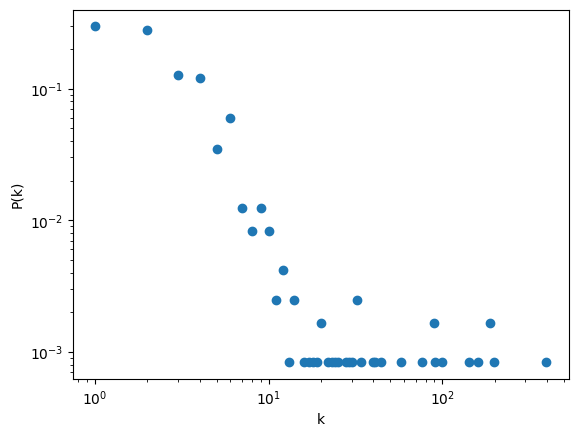

In [19]:
# 次数分布の計算
degree_dist = np.array(nx.degree_histogram(g)) / float(len(g))

# 描画
k = np.arange(len(degree_dist))
plt.loglog(k, degree_dist, 'o')
plt.xlabel('k')
plt.ylabel('P(k)')

累積分布で表示する場合

Text(0, 0.5, 'P(k)')

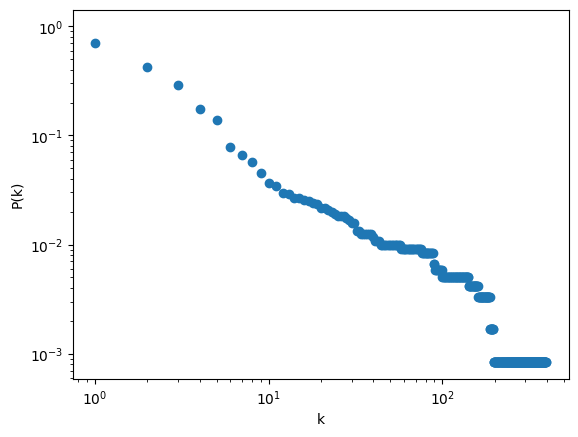

In [20]:
# 累積分布の計算
ccdf = np.round(1 - np.cumsum(degree_dist),12)

# 描画
k = np.arange(len(degree_dist))
plt.loglog(k, ccdf, 'o')
plt.xlabel('k')
plt.ylabel('P(k)')

次数分布を使っても平均次数を求められる。

In [21]:
np.sum(k * degree_dist)

4.6605657237936775

## 同類度係数

無向ネットワークの場合（重みなし）式(2.8)

In [22]:
nx.degree_assortativity_coefficient(g)

-0.33598536993023903

有向ネットワークの場合

In [23]:
# 入次数を使用する場合
nx.degree_assortativity_coefficient(g_dir, x='in', y='in')

# 出次数を使用する場合
nx.degree_assortativity_coefficient(g_dir, x='out', y='out')

# 入次数と出次数の混合を使用する場合
nx.degree_assortativity_coefficient(g_dir, x='in', y='out')

-0.028015311974269392

## クラスタ係数

各ノードに対するクラスタ係数

In [24]:
cc = nx.clustering(g)

平均クラスタ係数

In [25]:
nx.average_clustering(g)

0.25969353909583504

もしくは

In [26]:
np.mean(list(cc.values()))

0.2596935390958357

## 重み付きクラスタ係数

In [27]:
# 各ノードの重み付きクラスタリング係数
wcc = nx.clustering(g, weight='weight')

# 平均重み付きクラスタリング係数
np.mean(list(wcc.values()))
# または
nx.average_clustering(g, weight='weight')

0.006331839127955939

## 最短経路

最短経路長行列：各ノード間の距離行列に対応する

In [28]:
distances = dict(nx.all_pairs_shortest_path_length(g))
# 重み付きの場合
distances = dict(nx.all_pairs_dijkstra_path_length(g, weight='weight'))

## 効率性
### 大域効率性

In [29]:
n = len(g)
nodal_global_efficiency = {}
for i in g.nodes():
  efficiency = 0
  for j in g.nodes():
      if i != j and j in distances[i]:
          efficiency += 1.0 / distances[i][j]
  nodal_global_efficiency[i] = efficiency / (n - 1)

ave_global_efficiency = sum(nodal_global_efficiency.values()) / n

print(f"Average Global Efficiency: {ave_global_efficiency}")

Average Global Efficiency: 0.5058656887131002


Average Global Efficiencyだけなら、``nx.global_efficiency()``でも求めることもできる。ただし、ノード毎のGlobal Efficiencyは計算されない。また重み付きネットワークには対応していない。

### 局所効率性

In [30]:
nodal_local_efficiency = {}
for node in g.nodes():
  # 隣接ノードを取得
  neighbors = list(g.neighbors(node))
  num_neighbors = len(neighbors)

  if num_neighbors > 1:
    # 隣接ノード間の効率性の合計を計算
    efficiency_sum = 0
    for i, j in permutations(neighbors, 2):
        # 隣接ノード間の距離を取得
        if j in distances[i]:
            efficiency_sum += 1.0 / distances[i][j]

    # ノードの局所効率性を計算
    local_eff = efficiency_sum / (num_neighbors * (num_neighbors - 1))
    nodal_local_efficiency[node] = local_eff

  else:
    nodal_local_efficiency[node] = 0

# 平均局所効率性を計算
ave_local_efficiency = sum(nodal_local_efficiency.values()) / len(g)

print(f"Average Local Efficiency: {ave_local_efficiency}")

Average Local Efficiency: 1.1969922135287185


Average Local Efficiencyだけなら、``nx.local_efficiency()``でも求めることもできる。ただし、ノード毎のLocal Efficiencyは計算されない。また重み付きネットワークには対応していない。

## やってみよう
* このNotebookを参考にして，別の生物ネットワークのネットワーク指標を計算してみよう（``data``に様々ある）。
* Notebookを参考に自分のデータを解析してみよう。